In [224]:
import glob # To read file names
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [225]:
#-- Data files names:
File_names = glob.glob('Manudata/*.csv')
File_names.sort()
File_names

['Manudata/bkg1.csv',
 'Manudata/bkg1signal250.csv',
 'Manudata/bkg2.csv',
 'Manudata/bkg2signal350.csv',
 'Manudata/bkg3.csv',
 'Manudata/bkg3signal1000.csv',
 'Manudata/signal1000.csv',
 'Manudata/signal250.csv',
 'Manudata/signal350.csv']

In [263]:
#-- Data in 1, 3 and 5 entries of File_names

dt = pd.DataFrame()

df1 = pd.read_csv(File_names[1], dtype=float)
df1.drop(columns=['Unnamed: 0'], inplace=True)
df2 = pd.read_csv(File_names[3], dtype=float)
df2.drop(columns=['Unnamed: 0'], inplace=True)
df3 = pd.read_csv(File_names[5], dtype=float)
df3.drop(columns=['Unnamed: 0'], inplace=True)

dt = pd.concat([dt, df1])
dt = pd.concat([dt, df2], ignore_index=True)
dt = pd.concat([dt, df3], ignore_index=True)

Cols_Ins = dt.columns.drop('Targets')
Inputs = dt[Cols_Ins].to_numpy()
Tags = dt['Targets'].to_numpy()

array([0., 1., 0., ..., 1., 0., 1.])

In [264]:
dt.keys()

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', 'Targets'],
      dtype='object')

In [268]:
print(Inputs)
type(Inputs)

[[107.455  88.149  96.416 ... 116.16   71.29  102.686]
 [ 80.295  75.811  88.149 ...  91.474 152.198 104.322]
 [106.569  63.174 134.729 ... 106.958 122.471 114.986]
 ...
 [131.544 128.946 194.314 ... 107.246 102.099 114.513]
 [136.914  98.601 110.939 ... 110.056  99.762 116.16 ]
 [128.946 114.423 148.252 ... 137.72  146.473 106.659]]


numpy.ndarray

[107.455  88.149  96.416  30.644  37.612 155.862  98.475  89.697 192.442
 214.777  88.262  98.599 116.16   71.29  102.686] (15,)


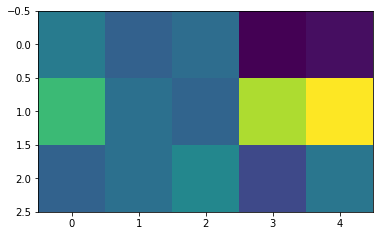

In [270]:
# Visualizar datos
print(Inputs[0], np.shape(Inputs[0]))
plt.imshow(Inputs[0].reshape(-1,5))

In [297]:
X = Inputs
Y = Tags.astype('int')
len(X), len(Y)

(1200, 1200)

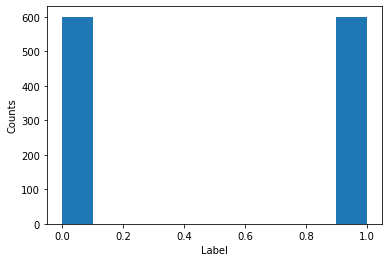

In [298]:
# Visualizar los datos
_ = plt.hist(Y)
plt.ylabel('Counts')
plt.xlabel('Label')
plt.show()

In [299]:
# Separar los datos entre entrenamiento y testeo
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
print(type(Y_test), type(Y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


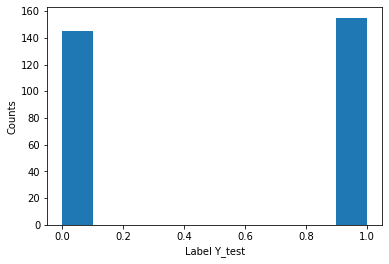

In [300]:
# Visualizar los datos
_ = plt.hist(Y_test)
plt.ylabel('Counts')
plt.xlabel('Label Y_test')
plt.show()

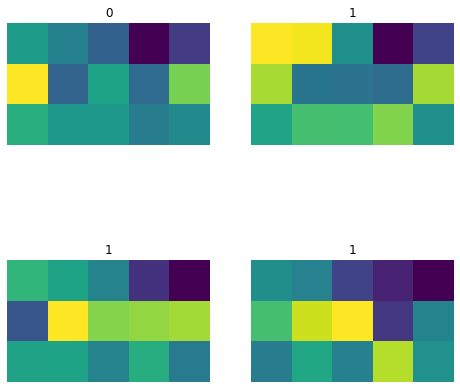

In [301]:
#-- Visualizamos los datos
fig = plt.figure(figsize=(8,8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(X_test[i*15].reshape(3,5))
    plt.title(Y_test[i*15])
    plt.axis(False)
plt.show()

In [302]:
# Definir la estructura del MLP
import torch

input_dim = 15
out_dim = 2

model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, out_dim),
    torch.nn.ReLU()
)
model

Sequential(
  (0): Linear(in_features=15, out_features=2, bias=True)
  (1): ReLU()
)

In [303]:
# Definir el optimizador y la función de perdida

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [308]:
from sklearn.metrics import f1_score # Nueva métrica (La revisaremos la próxima sesión)

n_epoch = 1000 # Número de épocas

#-- Listas de evaluación entrenamiento
loss_train = np.zeros(n_epoch)
f1_train = np.zeros(n_epoch)

#-- Listas de evaluación test
loss_test = np.zeros(n_epoch)
f1_test = np.zeros(n_epoch)

X_train_tensor = torch.from_numpy(X_train)
X_test_tensor = torch.from_numpy(X_test)

Y_train_tensor = torch.from_numpy(Y_train)
Y_test_tensor = torch.from_numpy(Y_test)


#-- Entrenamineto del MLP
for epoch in range(n_epoch):
    model.train()

    Y_pred = model(X_train_tensor.float())

    loss = criterion(Y_pred,Y_train_tensor)
    loss_train[epoch] = loss.item()

    Y_pred = torch.argmax(Y_pred, 1)
    f1_train[epoch] = f1_score(Y_train,Y_pred, average='macro')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print( f'Epoch [{epoch+1}/{n_epoch}], loss: {loss_train[-1]}. f1:{f1_train[-1]}')

    model.eval()
    
    Y_pred = model(X_test_tensor.float())  
    loss = criterion(Y_pred,Y_test_tensor)
    loss_test[epoch] = loss.item()

    Y_pred = torch.argmax(Y_pred, 1)
    f1_test[epoch] = f1_score(Y_test, Y_pred, average='macro') 

Epoch [1/1000], loss: 0.0. f1:0.0
Epoch [2/1000], loss: 0.0. f1:0.0
Epoch [3/1000], loss: 0.0. f1:0.0
Epoch [4/1000], loss: 0.0. f1:0.0
Epoch [5/1000], loss: 0.0. f1:0.0
Epoch [6/1000], loss: 0.0. f1:0.0
Epoch [7/1000], loss: 0.0. f1:0.0
Epoch [8/1000], loss: 0.0. f1:0.0
Epoch [9/1000], loss: 0.0. f1:0.0
Epoch [10/1000], loss: 0.0. f1:0.0
Epoch [11/1000], loss: 0.0. f1:0.0
Epoch [12/1000], loss: 0.0. f1:0.0
Epoch [13/1000], loss: 0.0. f1:0.0
Epoch [14/1000], loss: 0.0. f1:0.0
Epoch [15/1000], loss: 0.0. f1:0.0
Epoch [16/1000], loss: 0.0. f1:0.0
Epoch [17/1000], loss: 0.0. f1:0.0
Epoch [18/1000], loss: 0.0. f1:0.0
Epoch [19/1000], loss: 0.0. f1:0.0
Epoch [20/1000], loss: 0.0. f1:0.0
Epoch [21/1000], loss: 0.0. f1:0.0
Epoch [22/1000], loss: 0.0. f1:0.0
Epoch [23/1000], loss: 0.0. f1:0.0
Epoch [24/1000], loss: 0.0. f1:0.0
Epoch [25/1000], loss: 0.0. f1:0.0
Epoch [26/1000], loss: 0.0. f1:0.0
Epoch [27/1000], loss: 0.0. f1:0.0
Epoch [28/1000], loss: 0.0. f1:0.0
Epoch [29/1000], loss: 0.0. f

Epoch [299/1000], loss: 0.0. f1:0.0
Epoch [300/1000], loss: 0.0. f1:0.0
Epoch [301/1000], loss: 0.0. f1:0.0
Epoch [302/1000], loss: 0.0. f1:0.0
Epoch [303/1000], loss: 0.0. f1:0.0
Epoch [304/1000], loss: 0.0. f1:0.0
Epoch [305/1000], loss: 0.0. f1:0.0
Epoch [306/1000], loss: 0.0. f1:0.0
Epoch [307/1000], loss: 0.0. f1:0.0
Epoch [308/1000], loss: 0.0. f1:0.0
Epoch [309/1000], loss: 0.0. f1:0.0
Epoch [310/1000], loss: 0.0. f1:0.0
Epoch [311/1000], loss: 0.0. f1:0.0
Epoch [312/1000], loss: 0.0. f1:0.0
Epoch [313/1000], loss: 0.0. f1:0.0
Epoch [314/1000], loss: 0.0. f1:0.0
Epoch [315/1000], loss: 0.0. f1:0.0
Epoch [316/1000], loss: 0.0. f1:0.0
Epoch [317/1000], loss: 0.0. f1:0.0
Epoch [318/1000], loss: 0.0. f1:0.0
Epoch [319/1000], loss: 0.0. f1:0.0
Epoch [320/1000], loss: 0.0. f1:0.0
Epoch [321/1000], loss: 0.0. f1:0.0
Epoch [322/1000], loss: 0.0. f1:0.0
Epoch [323/1000], loss: 0.0. f1:0.0
Epoch [324/1000], loss: 0.0. f1:0.0
Epoch [325/1000], loss: 0.0. f1:0.0
Epoch [326/1000], loss: 0.0.

Epoch [547/1000], loss: 0.0. f1:0.0
Epoch [548/1000], loss: 0.0. f1:0.0
Epoch [549/1000], loss: 0.0. f1:0.0
Epoch [550/1000], loss: 0.0. f1:0.0
Epoch [551/1000], loss: 0.0. f1:0.0
Epoch [552/1000], loss: 0.0. f1:0.0
Epoch [553/1000], loss: 0.0. f1:0.0
Epoch [554/1000], loss: 0.0. f1:0.0
Epoch [555/1000], loss: 0.0. f1:0.0
Epoch [556/1000], loss: 0.0. f1:0.0
Epoch [557/1000], loss: 0.0. f1:0.0
Epoch [558/1000], loss: 0.0. f1:0.0
Epoch [559/1000], loss: 0.0. f1:0.0
Epoch [560/1000], loss: 0.0. f1:0.0
Epoch [561/1000], loss: 0.0. f1:0.0
Epoch [562/1000], loss: 0.0. f1:0.0
Epoch [563/1000], loss: 0.0. f1:0.0
Epoch [564/1000], loss: 0.0. f1:0.0
Epoch [565/1000], loss: 0.0. f1:0.0
Epoch [566/1000], loss: 0.0. f1:0.0
Epoch [567/1000], loss: 0.0. f1:0.0
Epoch [568/1000], loss: 0.0. f1:0.0
Epoch [569/1000], loss: 0.0. f1:0.0
Epoch [570/1000], loss: 0.0. f1:0.0
Epoch [571/1000], loss: 0.0. f1:0.0
Epoch [572/1000], loss: 0.0. f1:0.0
Epoch [573/1000], loss: 0.0. f1:0.0
Epoch [574/1000], loss: 0.0.

Epoch [777/1000], loss: 0.0. f1:0.0
Epoch [778/1000], loss: 0.0. f1:0.0
Epoch [779/1000], loss: 0.0. f1:0.0
Epoch [780/1000], loss: 0.0. f1:0.0
Epoch [781/1000], loss: 0.0. f1:0.0
Epoch [782/1000], loss: 0.0. f1:0.0
Epoch [783/1000], loss: 0.0. f1:0.0
Epoch [784/1000], loss: 0.0. f1:0.0
Epoch [785/1000], loss: 0.0. f1:0.0
Epoch [786/1000], loss: 0.0. f1:0.0
Epoch [787/1000], loss: 0.0. f1:0.0
Epoch [788/1000], loss: 0.0. f1:0.0
Epoch [789/1000], loss: 0.0. f1:0.0
Epoch [790/1000], loss: 0.0. f1:0.0
Epoch [791/1000], loss: 0.0. f1:0.0
Epoch [792/1000], loss: 0.0. f1:0.0
Epoch [793/1000], loss: 0.0. f1:0.0
Epoch [794/1000], loss: 0.0. f1:0.0
Epoch [795/1000], loss: 0.0. f1:0.0
Epoch [796/1000], loss: 0.0. f1:0.0
Epoch [797/1000], loss: 0.0. f1:0.0
Epoch [798/1000], loss: 0.0. f1:0.0
Epoch [799/1000], loss: 0.0. f1:0.0
Epoch [800/1000], loss: 0.0. f1:0.0
Epoch [801/1000], loss: 0.0. f1:0.0
Epoch [802/1000], loss: 0.0. f1:0.0
Epoch [803/1000], loss: 0.0. f1:0.0
Epoch [804/1000], loss: 0.0.

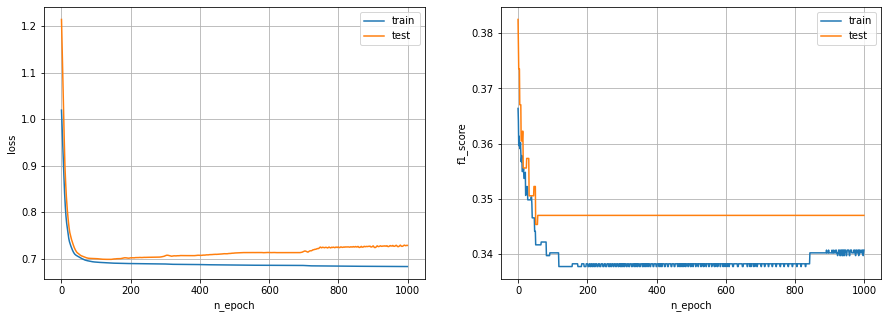

In [309]:
#-- Visualizamos las curvas de entrenamiento y testeo

fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_test, label='test')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,2,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_test, label='test')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()

plt.show()

In [310]:
np.argmin(np.array(loss_test)[np.array(f1_train) < 1]), min(np.array(loss_test)[np.array(f1_train) < 1])

(143, 0.6982385516166687)